In [162]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from google.colab import files
import re
import scipy.stats as stats




### Importando e preparando os dados

Feito em partes, já que foram verificadas diferenças
 na configuração HTML de cada página.

In [82]:
url = 'https://www.bolanaarea.com/brasileirao_2006.htm'
t2006=pd.read_html(url, match='Internacional', na_values='-')
df000=t2006[3]

In [83]:
df000

,0,1,2,3,4,5,6,7,8
0,CLUBES,PG,J,V,E,D,GP,GC,SG
1,1º São Paulo (SP),78,38,22,12,4,66,32,34
2,2º Internacional (RS),69,38,20,9,9,52,36,16
3,3º Grêmio (RS),67,38,20,7,11,64,45,19
4,4º Santos (SP),64,38,18,10,10,58,36,22
5,5º Paraná (PR),60,38,18,6,14,56,49,7
6,6º Vasco (RJ),59,38,15,14,9,57,50,7
7,7º Figueirense (SC),57,38,15,12,11,52,44,8
8,8º Goiás (GO),55,38,15,10,13,63,49,14
9,9º Corinthians (SP),53,38,15,8,15,41,46,-5


In [84]:
df000.dropna(inplace=True)

df000.at[0, 0] = "Time"
df000.columns = df000.iloc[0]
df000["Posicao0"]=df000["Time"].str[0]
df000["Posicao1"]=df000["Time"].str[1]
df000["Posicao"]=df000["Posicao0"] + df000["Posicao1"]

df000 = df000.reindex(columns=["Ano",'Posicao',"Time","PG","J","V","E","D","GP","GC","SG"])
df000.drop([0], inplace=True)
df000["Time"]=df000["Time"].str.replace('º', '')
df000["Time"]=df000["Time"].str.replace('[0-9]', '')
df000["Ano"]=2006

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


In [85]:
def scrape_stats00(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        if year == 2007: 
          table = soup.find('table',{'id':'table68'})
        elif year ==2008: 
          table = soup.find('table',{'id':'table349'})
        elif year ==2009:  
          table = soup.find('table',{'id':'table500'})
        elif year ==2010: 
          table = soup.find('table',{'id':'table584'})
        elif year ==2011:  
          table = soup.find('table',{'id':'table656'})
        elif year ==2012: 
          table = soup.find('table',{'id':'table757'})
        else:
          table = soup.find('table',{'id':'table842'})
        print (req_url)
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.bolanaarea.com/brasileirao_{}.htm'
df00 = scrape_stats00(url, 2007, 2011)

Extraindo ano 2007
https://www.bolanaarea.com/brasileirao_2007.htm
Extraindo ano 2008
https://www.bolanaarea.com/brasileirao_2008.htm
Extraindo ano 2009
https://www.bolanaarea.com/brasileirao_2009.htm
Extraindo ano 2010
https://www.bolanaarea.com/brasileirao_2010.htm
Extraindo ano 2011
https://www.bolanaarea.com/brasileirao_2011.htm


In [86]:
df00.dropna(inplace=True)

df00.at[0, 'Year'] = "Ano"
df00.at[0, 0] = "Time"
df00.columns = df00.iloc[0]
df00["Posicao0"]=df00["Time"].str[(0)]
df00["Posicao1"]=df00["Time"].str[(1)]
df00["Posicao"]=df00["Posicao0"] + df00["Posicao1"]
df00.drop(columns=["Posicao0","Posicao1"],inplace=True)

df00 = df00.reindex(columns=["Ano",'Posicao',"Time","PG","J","V","E","D","GP","GC","SG"])
df00.drop([0], inplace=True)
df00["Time"]=df00["Time"].str.replace('º', '')
df00["Time"]=df00["Time"].str.replace('[0-9]', '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [87]:
def scrape_stats0(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table',{'id':'table757'})
        print (req_url)
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.bolanaarea.com/brasileirao_{}.htm'
df0 = scrape_stats0(url, 2012, 2012)

Extraindo ano 2012
https://www.bolanaarea.com/brasileirao_2012.htm


In [88]:
df0.at[0, 1] = "Time"
df0.columns = df0.iloc[0]
df0.rename(columns={"C": 'Posicao'},inplace=True)
df0.rename(columns={2012: 'Ano'},inplace=True)
df0.dropna(inplace=True)
df0 = df0.reindex(columns=["Ano",'Posicao',"Time","PG","J","V","E","D","GP","GC","SG"])
df0.drop([0], inplace=True)

In [89]:

def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table',{'id':'table842'})
        print (req_url)
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.bolanaarea.com/brasileirao_{}.htm'
df = scrape_stats(url, 2013, 2021)


Extraindo ano 2013
https://www.bolanaarea.com/brasileirao_2013.htm
Extraindo ano 2014
https://www.bolanaarea.com/brasileirao_2014.htm
Extraindo ano 2015
https://www.bolanaarea.com/brasileirao_2015.htm
Extraindo ano 2016
https://www.bolanaarea.com/brasileirao_2016.htm
Extraindo ano 2017
https://www.bolanaarea.com/brasileirao_2017.htm
Extraindo ano 2018
https://www.bolanaarea.com/brasileirao_2018.htm
Extraindo ano 2019
https://www.bolanaarea.com/brasileirao_2019.htm
Extraindo ano 2020
https://www.bolanaarea.com/brasileirao_2020.htm
Extraindo ano 2021
https://www.bolanaarea.com/brasileirao_2021.htm


In [90]:
df[0].fillna(" ",inplace=True)
df[1].fillna(" ",inplace=True)
df[0]=df[0].str.replace('º', '')
df[1]=df[1].str.replace('º', '')
df["posicao"]=(df[0]+df[1])
df.at[0, 'posicao'] = "Posicao"
df.at[0, 'Year'] = "Ano"
df.at[0, 2] = "Time"
df.drop(columns=[0,1],inplace=True)
df.columns = df.iloc[0]
df.dropna(inplace=True)
df.drop([0], inplace=True)
df = df.reindex(columns=["Ano",'Posicao',"Time","PG","J","V","E","D","GP","GC","SG"])




In [91]:
df=pd.concat([df000,df00,df0, df])

In [92]:
df["Time"]=df["Time"].str.upper()


In [93]:
df["Time"]=df["Time"].str.replace('Ê', 'E')
df["Time"]=df["Time"].str.replace('É', 'E')
df["Time"]=df["Time"].str.replace('Ó', 'O')
df["Time"]=df["Time"].str.replace('Ô', 'O')
df["Time"]=df["Time"].str.replace('Õ', 'O')
df["Time"]=df["Time"].str.replace('Í', 'I')
df["Time"]=df["Time"].str.replace('Ú', 'U')
df["Time"]=df["Time"].str.replace('Ü', 'U')
df["Time"]=df["Time"].str.replace('Ã', 'A')
df["Time"]=df["Time"].str.replace('Á', 'A')
df["Time"]=df["Time"].str.replace('Â', 'A')
df["Time"]=df["Time"].str.replace('À', 'A')
df["Time"]=df["Time"].str.replace('ATLETICO (PR)', 'ATHLETICO (PR)')
df["Posicao"]=df["Posicao"].str.replace('º', '')
df["Time"]=df["Time"].str.replace('*', '')
d = {'ATLETICO (PR)':'ATHLETICO (PR)'}
df = df.replace(d)
df["Time"]=df["Time"].str.strip()
df["Posicao"]=df["Posicao"].str.strip()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


In [94]:
df[-50:]

,Ano,Posicao,Time,PG,J,V,E,D,GP,GC,SG
11,2019,11,BAHIA (BA),49,38,12,13,13,44,43,1
12,2019,12,VASCO (RJ),49,38,12,13,13,39,45,-6
13,2019,13,ATLETICO (MG),48,38,13,9,16,45,49,-4
14,2019,14,FLUMINENSE (RJ),46,38,12,10,16,38,46,-8
15,2019,15,BOTAFOGO (RJ),43,38,13,4,21,31,45,-14
16,2019,16,CEARA (CE),39,38,10,9,19,36,41,-5
17,2019,17,CRUZEIRO (MG),36,38,7,15,16,27,46,-19
18,2019,18,CSA (AL),32,38,8,8,22,24,58,-34
19,2019,19,CHAPECOENSE (SC),32,38,7,11,20,31,52,-21
20,2019,20,AVAI (SC),20,38,3,11,24,18,62,-44


In [95]:
df["PG"]=df["PG"].astype('int')
df["J"]=df["J"].astype('int')
df["SG"]=df["SG"].astype('int')
df["V"]=df["V"].astype('int')
df["E"]=df["E"].astype('int')
df["D"]=df["D"].astype('int')
df["GP"]=df["GP"].astype('int')
df["GC"]=df["GC"].astype('int')
df["Posicao"]=df["Posicao"].astype('int')

In [64]:
df2=df.copy()

### Distribuição dos dados posição final a posição final


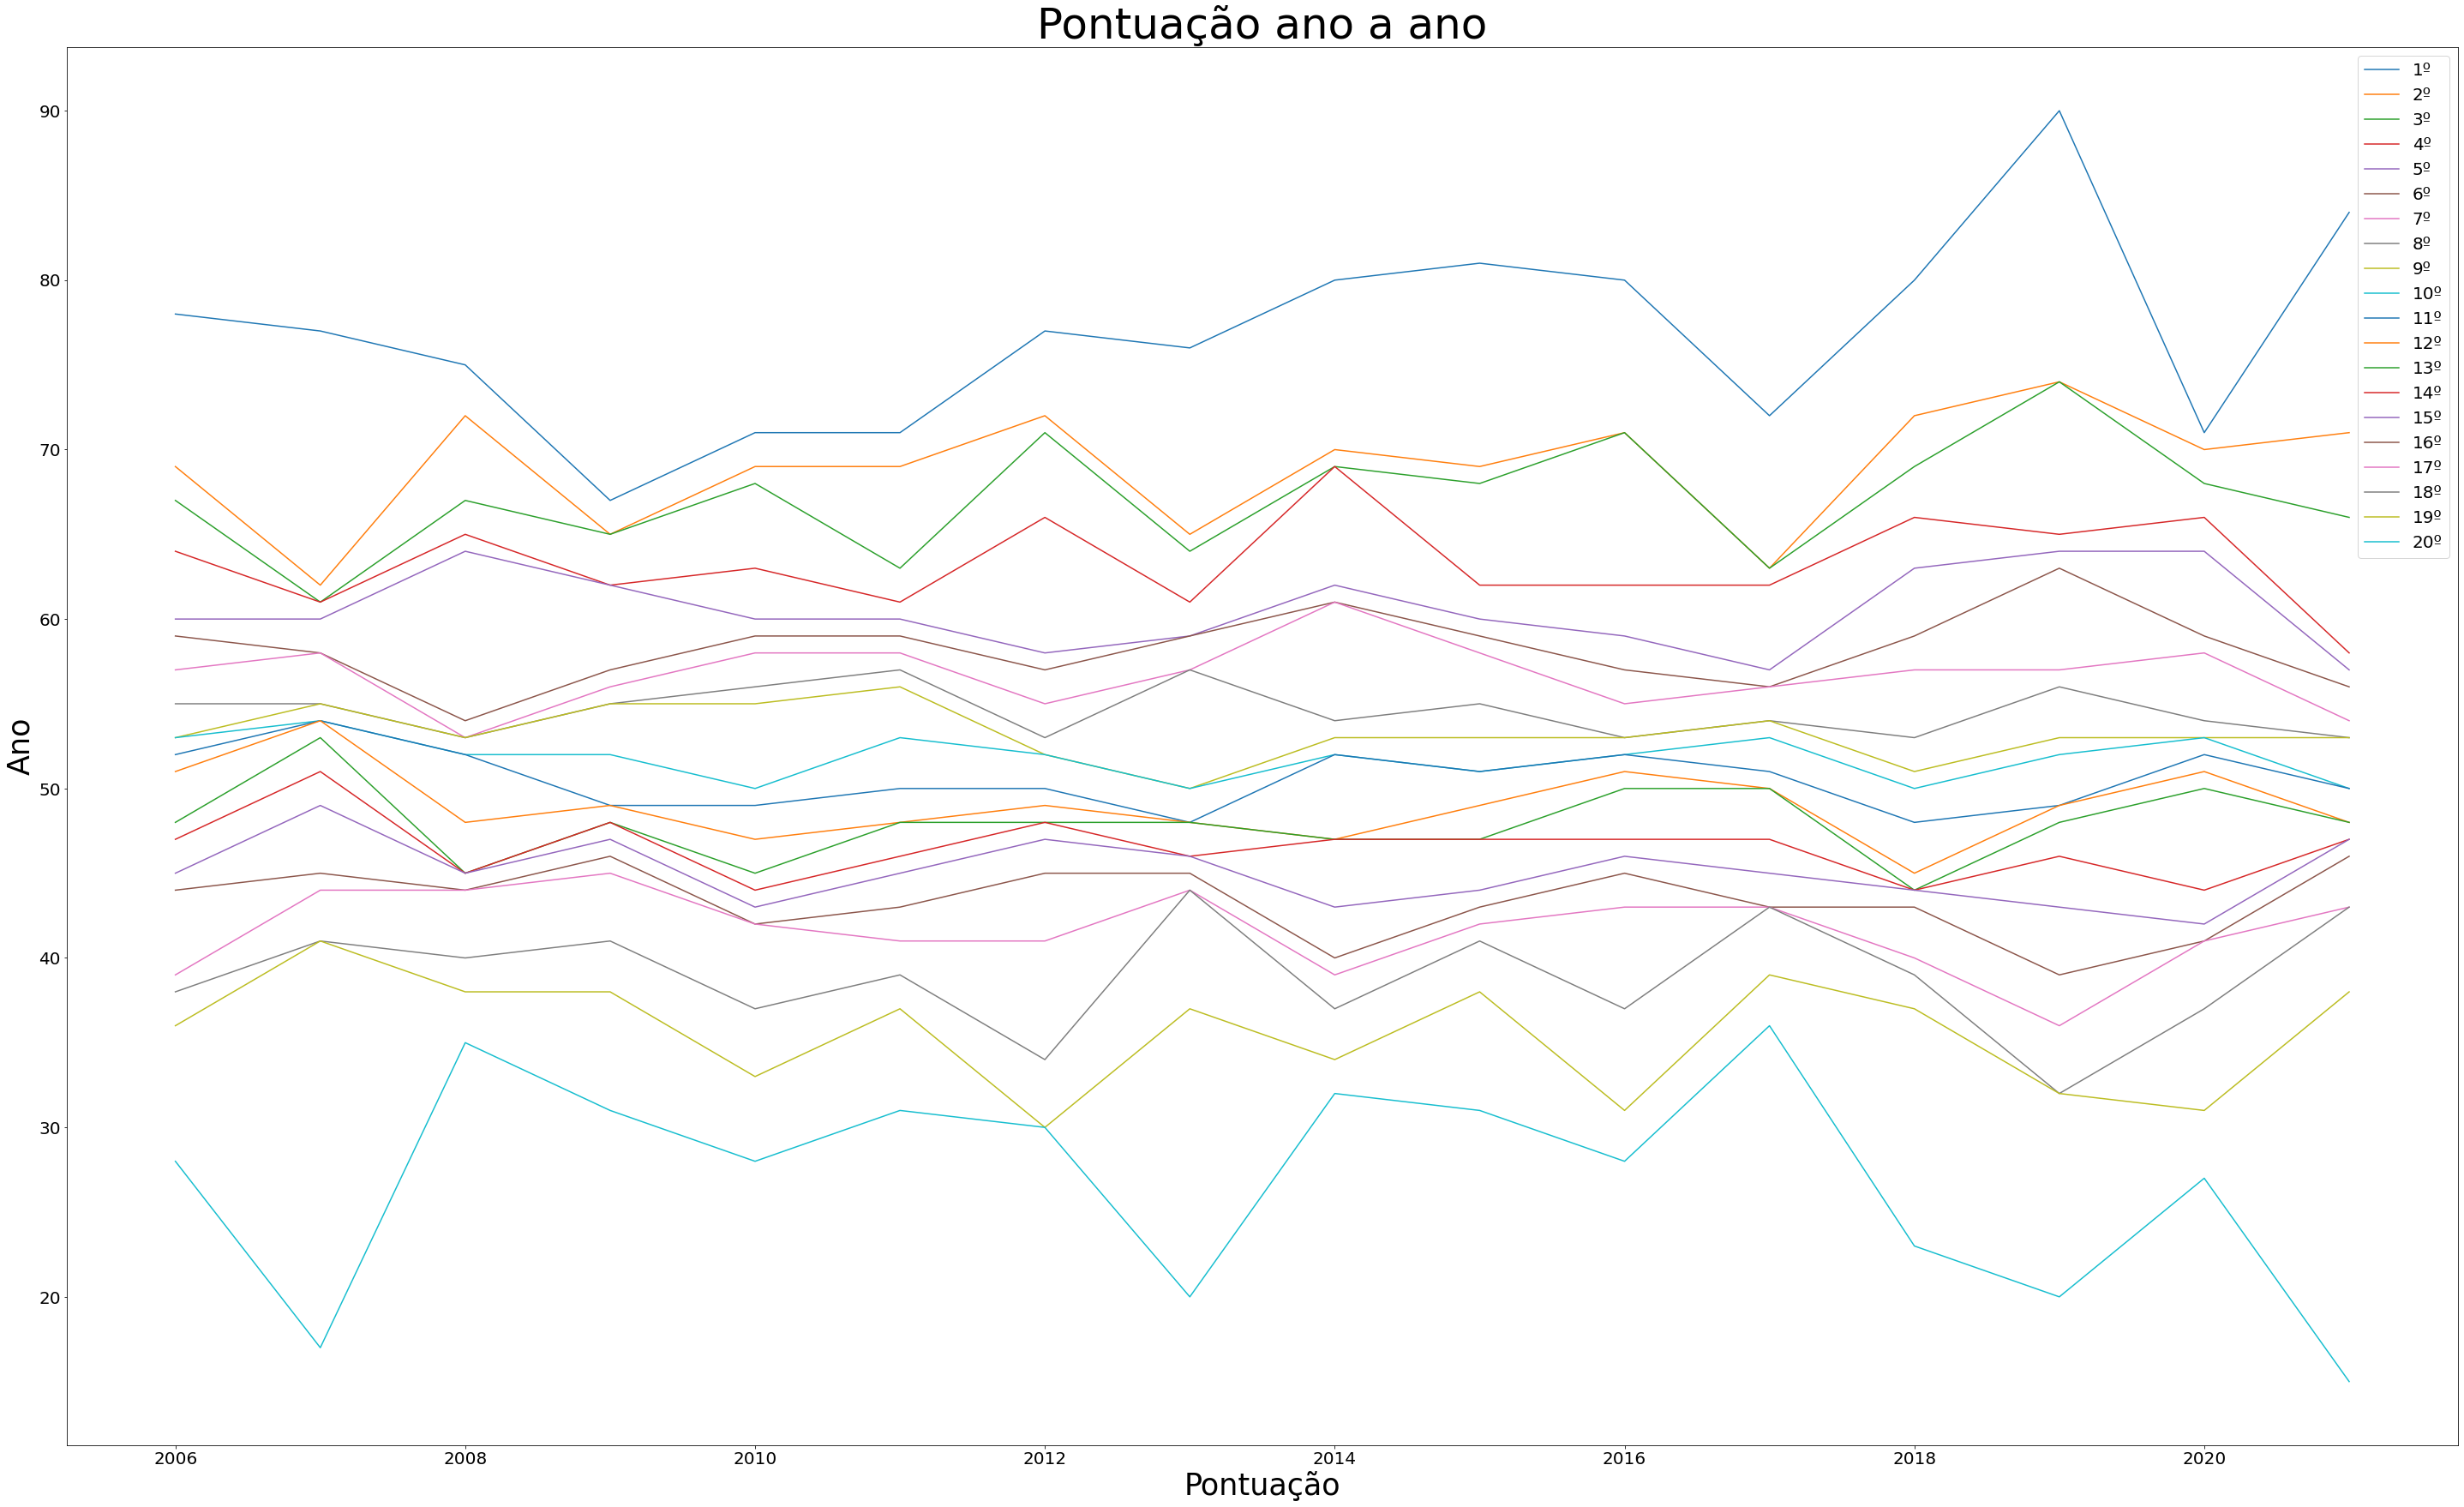

In [124]:
plt.figure(figsize=(50, 30))
for i in range(1,21):
  globals()[f"dados{i}"]=df.groupby('Posicao').get_group(i)
  globals()[f"dados{i}"].set_index("Ano",inplace=True)
  plt.plot(globals()[f"dados{i}"]["PG"],label=f"{i}º")
  plt.legend(fontsize=20)
  plt.xlabel('Pontuação',fontsize=35)
  plt.ylabel('Ano',fontsize=35)
  plt.title('Pontuação ano a ano',fontsize=50)
  plt.rcParams['xtick.labelsize'] = 35
  plt.rcParams['ytick.labelsize'] = 35


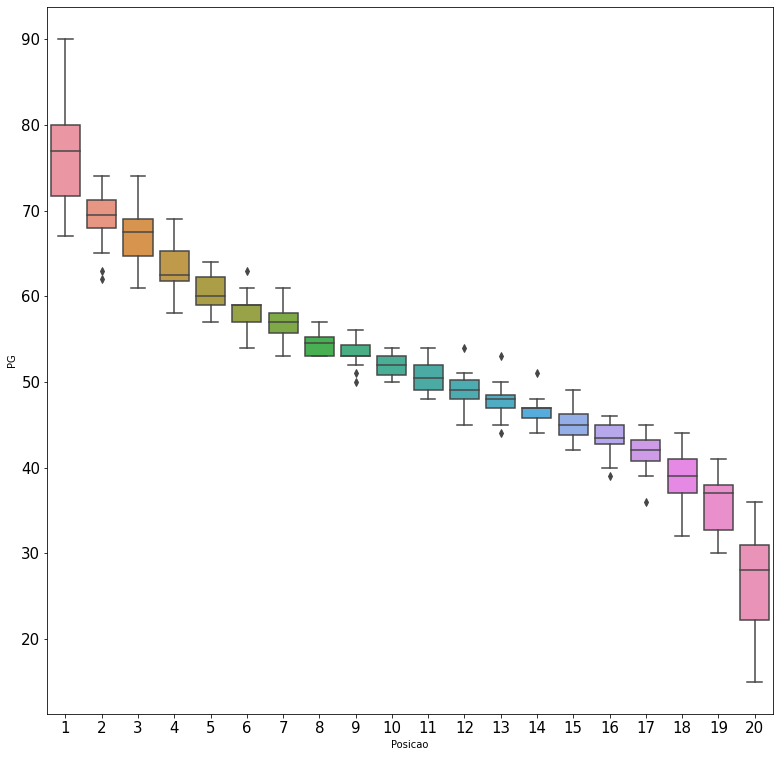

In [128]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.figure(figsize=(13, 13))
ax = sns.boxplot(y="PG", x="Posicao",
                 data=df, linewidth=1.5)



### Análise time por time

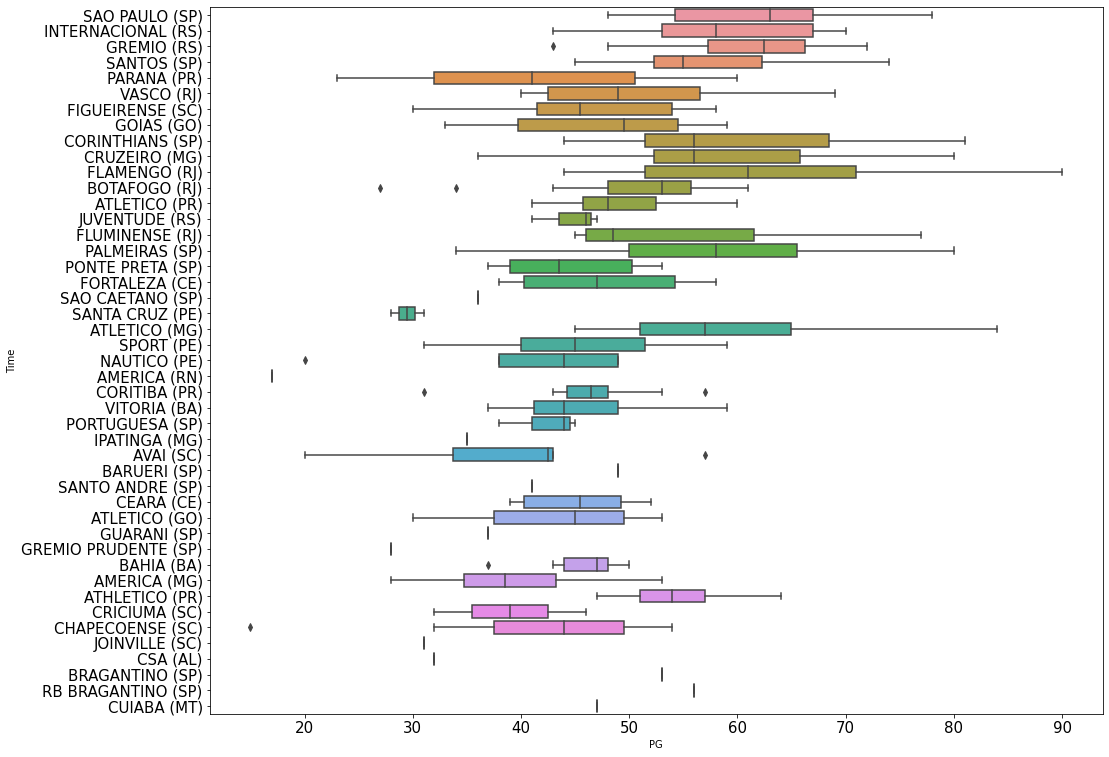

In [129]:
plt.figure(figsize=(16, 13))
ax = sns.boxplot(y="Time", x="PG",data=df, linewidth=1.5)



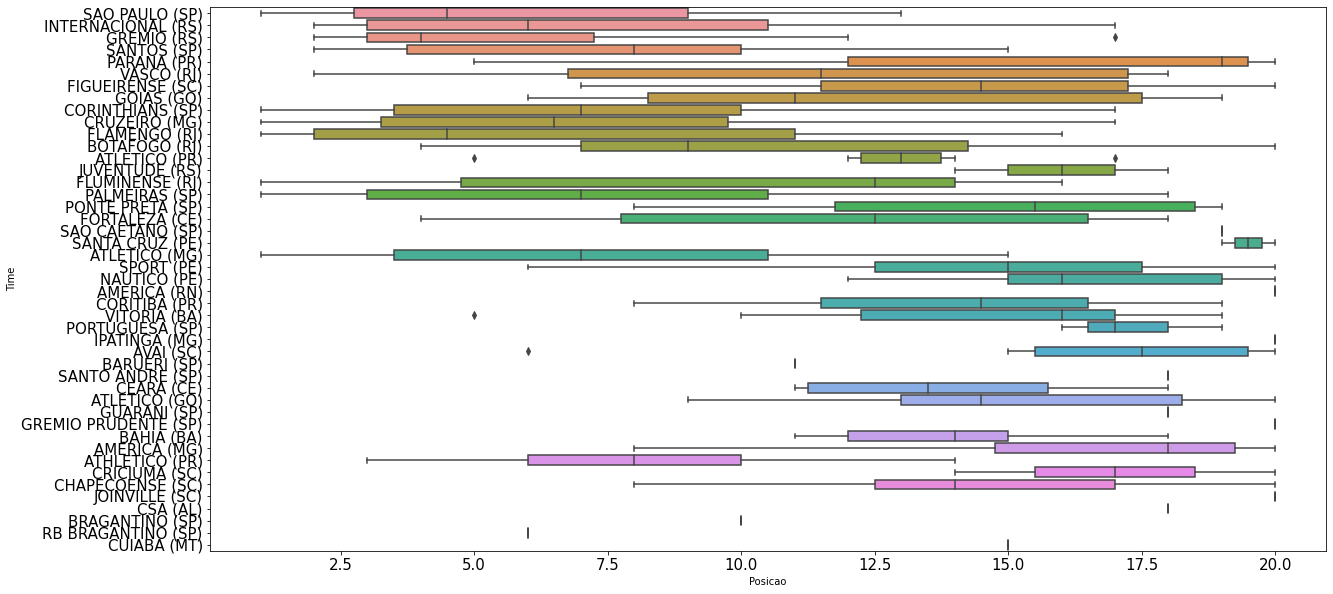

In [130]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(y="Time", x="Posicao",data=df, linewidth=1.5)

In [25]:
'''probabilidadeinicial=0
pontuacao1=[]
for i in range (0,115):
  media = dados1["PG"].mean()
  desvio_padrao = dados1["PG"].std()
  Z_inferior = (0 - media) / desvio_padrao
  Z_superior = (i - media) / desvio_padrao

  probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
  probabilidadepontuacao=probabilidade-probabilidadeinicial
  probabilidadeinicial = probabilidade
  soma+=probabilidadepontuacao
  pontuacao1.append(probabilidadepontuacao)'''



'probabilidadeinicial=0\npontuacao1=[]\nfor i in range (0,115):\n  media = dados1["PG"].mean()\n  desvio_padrao = dados1["PG"].std()\n  Z_inferior = (0 - media) / desvio_padrao\n  Z_superior = (i - media) / desvio_padrao\n\n  probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)\n  probabilidadepontuacao=probabilidade-probabilidadeinicial\n  probabilidadeinicial = probabilidade\n  soma+=probabilidadepontuacao\n  pontuacao1.append(probabilidadepontuacao)'

#Probabilidades de um time em determinada posição terminar com cada pontuação


In [137]:
#Supondo comportamento de uma normal -> normalidade deve ser testada para validação
for i in range (1,21):
  probabilidadeinicial=0
  globals()[f"pontuacao{i}"]=[]
  soma=[]
  for x in range (0,115):
    media = globals()[f"dados{i}"]["PG"].mean()
    desvio_padrao = globals()[f"dados{i}"]["PG"].std()
    Z_inferior = (0 - media) / desvio_padrao
    Z_superior = (x - media) / desvio_padrao

    probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
    probabilidadepontuacao=probabilidade-probabilidadeinicial
    probabilidadeinicial = probabilidade
    soma+=probabilidadepontuacao
    probabilidadepontuacao=probabilidadepontuacao.round(4)
    globals()[f"pontuacao{i}"].append(probabilidadepontuacao)

In [138]:
listaprob=[pontuacao1,pontuacao2,pontuacao3,pontuacao4,pontuacao5,pontuacao6,pontuacao7,pontuacao8,pontuacao9,pontuacao10,
           pontuacao11,pontuacao12,pontuacao13,pontuacao14,pontuacao15,pontuacao16,pontuacao17,pontuacao18,pontuacao19,pontuacao20]

In [139]:
tabprob=pd.DataFrame(listaprob)

In [140]:
tabprob=tabprob.T

In [141]:
tabprob.columns = range(1,21)

In [142]:
tabprob.index = range(0,115)

In [ ]:
### Na tabela abaixo, pode-se ver que há 3,06% de chance de o primeiro colocado acabar com 70 pontos, por exemplo.

In [172]:
tabprob[60:70]

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Soma
60,0.0008,0.0028,0.0097,0.0553,0.1516,0.1575,0.0752,0.0008,0.0001,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4538
61,0.0012,0.0059,0.0178,0.0860,0.1673,0.1072,0.0316,0.0001,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4171
62,0.0020,0.0115,0.0301,0.1170,0.1549,0.0586,0.0102,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3843
63,0.0031,0.0205,0.0467,0.1393,0.1203,0.0257,0.0025,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3581
64,0.0047,0.0336,0.0665,0.1452,0.0783,0.0090,0.0005,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3378
65,0.0070,0.0507,0.0869,0.1325,0.0428,0.0026,0.0001,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3226
66,0.0099,0.0704,0.1043,0.1059,0.0196,0.0006,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3107
67,0.0138,0.0899,0.1149,0.0740,0.0075,0.0001,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3002
68,0.0185,0.1056,0.1161,0.0453,0.0024,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2879
69,0.0242,0.1142,0.1077,0.0243,0.0007,0.0000,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2711


Se fizer determinada pontuação, qual a chance de terminar em cada pontuação?


In [148]:
tabprob["Soma"]=tabprob[1]+tabprob[2]+tabprob[3]+tabprob[4]+tabprob[5]+tabprob[6]+tabprob[7]+tabprob[8]+tabprob[9]+tabprob[10]+tabprob[11]+tabprob[12]+tabprob[13]+tabprob[14]+tabprob[15]+tabprob[16]+tabprob[17]+tabprob[18]+tabprob[19]+tabprob[20]

In [149]:
tabprob2=tabprob.copy()

In [161]:
tabprob2[0:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [151]:
for i in range(1,21):
  tabprob2[i]=tabprob2[i]/tabprob2["Soma"]

In [156]:
tabprob2.drop(columns=['Soma'],inplace=True)

In [157]:
tabprob2.fillna(value=0, inplace=True)

In [158]:
tabprob2[1][90:115]=1

In [159]:
tabprob2[20][0:5]=1


###Ranking


In [173]:
dadosr=df.copy()

In [174]:
dadosr

,Ano,Posicao,Time,PG,J,V,E,D,GP,GC,SG
1,2006,1,SAO PAULO (SP),78,38,22,12,4,66,32,34
2,2006,2,INTERNACIONAL (RS),69,38,20,9,9,52,36,16
3,2006,3,GREMIO (RS),67,38,20,7,11,64,45,19
4,2006,4,SANTOS (SP),64,38,18,10,10,58,36,22
5,2006,5,PARANA (PR),60,38,18,6,14,56,49,7
...,...,...,...,...,...,...,...,...,...,...,...
16,2021,16,JUVENTUDE (RS),46,38,11,13,14,36,44,-8
17,2021,17,GREMIO (RS),43,38,12,7,19,44,51,-7
18,2021,18,BAHIA (BA),43,38,11,10,17,42,51,-9
19,2021,19,SPORT (PE),38,38,9,11,18,24,37,-13


In [175]:
def pontuacaoranking(i):
  if i==1:
    return 500
  elif i==2:
    return 450
  elif i==3:
    return 410
  elif i==4:
    return 380
  elif i==5:
    return 350
  elif i>=6 and i<=16:
    return 440-20*i
  else:
    return 100




In [176]:
def peso_anual(i):
  ano=dadosr["Ano"].max()
  if i==ano:
    return 1
  elif i==ano-1:
    return 0.85
  elif i==ano-2:
    return 0.75
  elif i==ano-3:
    return 0.70
  elif i==ano-4:
    return 0.65
  else:
    return 0.60

In [177]:
dadosr["Anualizacao"]=dadosr["Ano"].apply(peso_anual)
dadosr["Pontuacao_bruta"]=dadosr["Posicao"].apply(pontuacaoranking)
dadosr["Pontos_ranking"]=dadosr["Anualizacao"]*(dadosr["Pontuacao_bruta"]+dadosr["PG"])

In [178]:
ranking=dadosr.drop(columns=["Ano","Posicao","PG","J","V","E","D","GP","GC","SG","Pontuacao_bruta","Anualizacao"])

In [179]:
ranking=ranking.groupby(["Time"]).sum()

In [180]:
ranking.sort_values(by=["Pontos_ranking"],ascending=False,inplace=True)

In [181]:
ranking2=dadosr.drop(columns=["Posicao","PG","J","V","E","D","GP","GC","SG","Pontuacao_bruta","Anualizacao"])


In [183]:
ranking

,Pontos_ranking
Time,
FLAMENGO (RJ),4354.25
SAO PAULO (SP),4278.35
GREMIO (RS),4129.00
SANTOS (SP),3817.95
ATLETICO (MG),3779.30
PALMEIRAS (SP),3758.35
CORINTHIANS (SP),3710.95
INTERNACIONAL (RS),3694.25
FLUMINENSE (RJ),3351.65


###Comparação entre equipes
Selecione as equipes que deseja comparar na evolução do ranking

Escolha o primeiro time em maíscula no formato : 'nome do time (estado)'PALMEIRAS (SP)
Escolha o segundo time em maíscula no formato : 'nome do time (estado)'SAO PAULO (SP)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


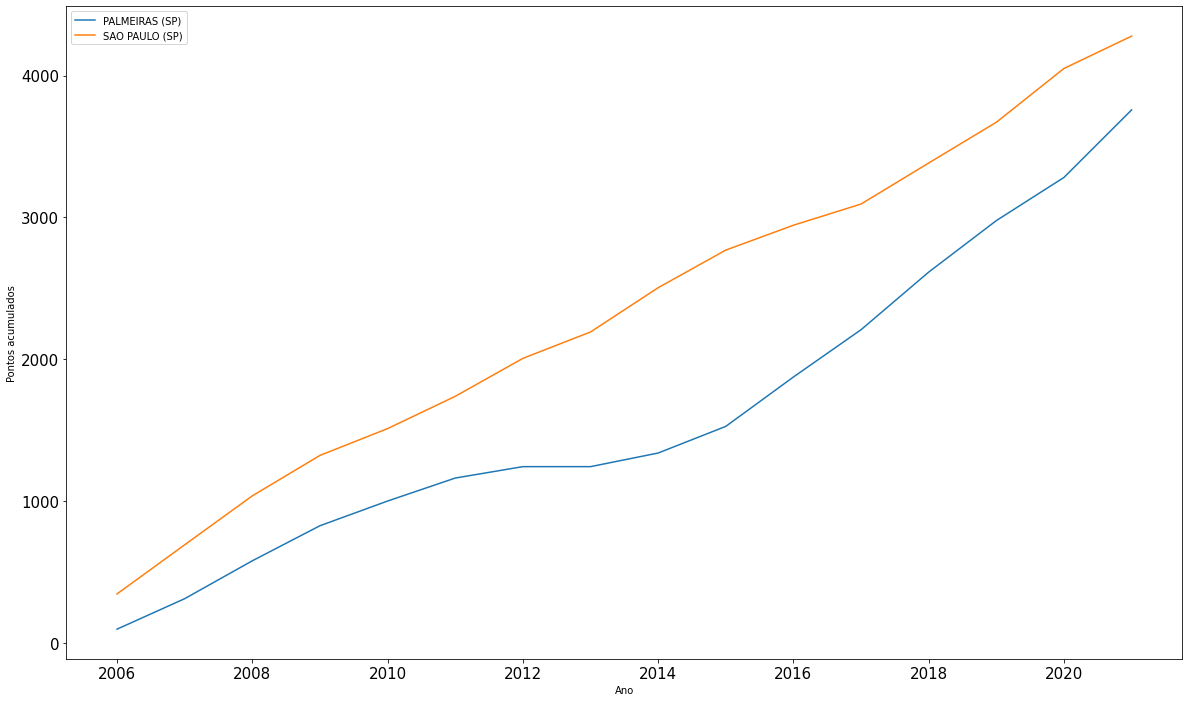

In [196]:
equipe1=input(str("Escolha o primeiro time em maíscula no formato : 'nome do time (estado)'"))
equipe2=input(str("Escolha o segundo time em maíscula no formato : 'nome do time (estado)'"))
time_1=(ranking2["Time"]=="{}".format(equipe1))
time_2=(ranking2["Time"]=="{}".format(equipe2))
time1=ranking2[time_1]
time2=ranking2[time_2]
time1.drop(columns="Time",inplace=True)
time1.rename(columns={"Pontos_ranking":"time1"},inplace=True)
time2.drop(columns="Time",inplace=True)
time2.rename(columns={"Pontos_ranking":"time2"},inplace=True)
comparacao = time1.merge(time2, on = "Ano", how = "right")
comparacao.set_index("Ano",inplace=True)
comparacao.fillna(0,inplace=True)
comparacao["Diferenca"]=comparacao["time1"]-comparacao["time2"]
comparacao['time1_acumulado'] = comparacao['time1'].cumsum()
comparacao['time2_acumulado'] = comparacao['time2'].cumsum()
comparacao['Diferenca_acumulada'] = comparacao['Diferenca'].cumsum()
plt.figure(figsize=(20, 12))
plt.plot(comparacao["time1_acumulado"],label="{}".format(equipe1))
plt.plot(comparacao["time2_acumulado"],label="{}".format(equipe2))
plt.legend(loc="upper left")
plt.xlabel("Ano")
plt.ylabel("Pontos acumulados")
plt.show()
comparacao.rename(columns={"time1":"{}".format(equipe1)},inplace=True)
comparacao.rename(columns={"time2":"{}".format(equipe2)},inplace=True)
comparacao.rename(columns={"time1_acumulado":"{}_acumulado".format(equipe1)},inplace=True)
comparacao.rename(columns={"time2_acumulado":"{}_acumulado".format(equipe2)},inplace=True)

In [197]:
comparacao

,PALMEIRAS (SP),SAO PAULO (SP),Diferenca,PALMEIRAS (SP)_acumulado,SAO PAULO (SP)_acumulado,Diferenca_acumulada
Ano,,,,,,
2006,98.40,346.80,-248.40,98.40,346.80,-248.40
2007,214.80,346.20,-131.40,313.20,693.00,-379.80
2008,267.00,345.00,-78.00,580.20,1038.00,-457.80
2009,247.20,285.00,-37.80,827.40,1323.00,-495.60
2010,174.00,189.00,-15.00,1001.40,1512.00,-510.60
2011,162.00,227.40,-65.40,1163.40,1739.40,-576.00
2012,80.40,267.60,-187.20,1243.80,2007.00,-763.20
2013,0.00,186.00,-186.00,1243.80,2193.00,-949.20
2014,96.00,312.00,-216.00,1339.80,2505.00,-1165.20
